Accuracy: 91.11%
Confusion matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



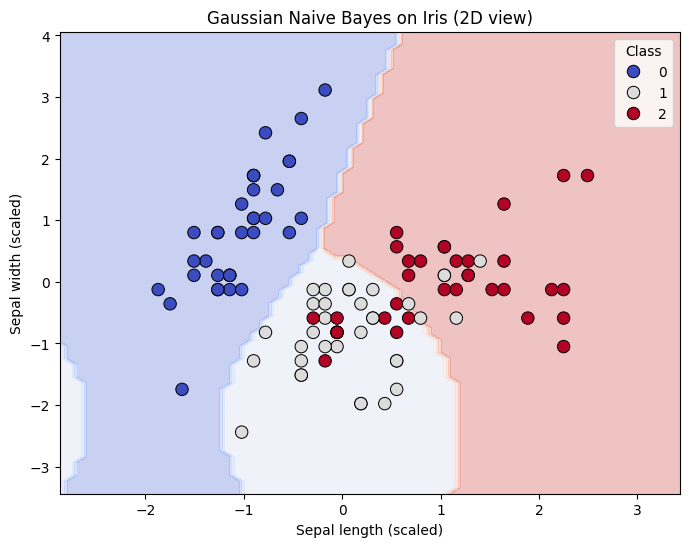

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load dataset
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

# 2. Encode target
le = LabelEncoder()
y = le.fit_transform(df['Species'])   # 0,1,2

# 3. Features (all 4)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# 4. Scale features (optional but common)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# 7. Predictions and evaluation
y_pred = nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# 8. 2D visualization using first two features (Sepal length & width)
X_train_2d = X_train[:, :2]

# Train again on 2D just for plotting
nb_2d = GaussianNB()
nb_2d.fit(X_train_2d, y_train)

x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(
                        np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1)
                    )

Z = nb_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(
                    x=X_train_2d[:, 0], y=X_train_2d[:, 1],
                    hue=y_train, palette='coolwarm', edgecolor='k', s=80
                )
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.title('Gaussian Naive Bayes on Iris (2D view)')
plt.legend(title='Class')
plt.show()
